# Задание

Набор данных: [Breast Cancer Data Set](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer')

Методы:
- Логистическая регрессия
- Метод потенциальных функций
- Метод Парзеновского окна

## 1. Анализ выборки

### Определение типов признаков

In [422]:
from sklearn.datasets import load_breast_cancer


data = load_breast_cancer()

In [423]:
import pandas as pd


df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [424]:
dtypes = df.dtypes

In [425]:
len(dtypes)

31

In [426]:
dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

Набор данных "Breast Cancer" из `sklearn.datasets` содержит следующие характеристики:

- **Признаки (features):** 30 числовых признаков, измеряющих различные характеристики клеток опухоли (например, радиус, текстура, периметр и т.д.).
- **Целевая переменная (target):** Бинарная переменная, обозначающая наличие или отсутствие рака (0 — злокачественная, 1 — доброкачественная опухоль).

Все признаки являются **вещественными (числовыми)**, и целевая переменная — **категориальной** (двоичной).

### Визуальный анализ данных

In [427]:
import seaborn as sns
import matplotlib.pyplot as plt

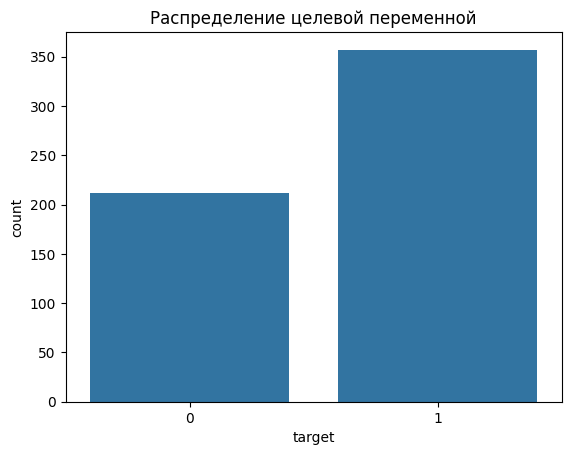

In [428]:
sns.countplot(x='target', data=df)
plt.title('Распределение целевой переменной')
plt.show()

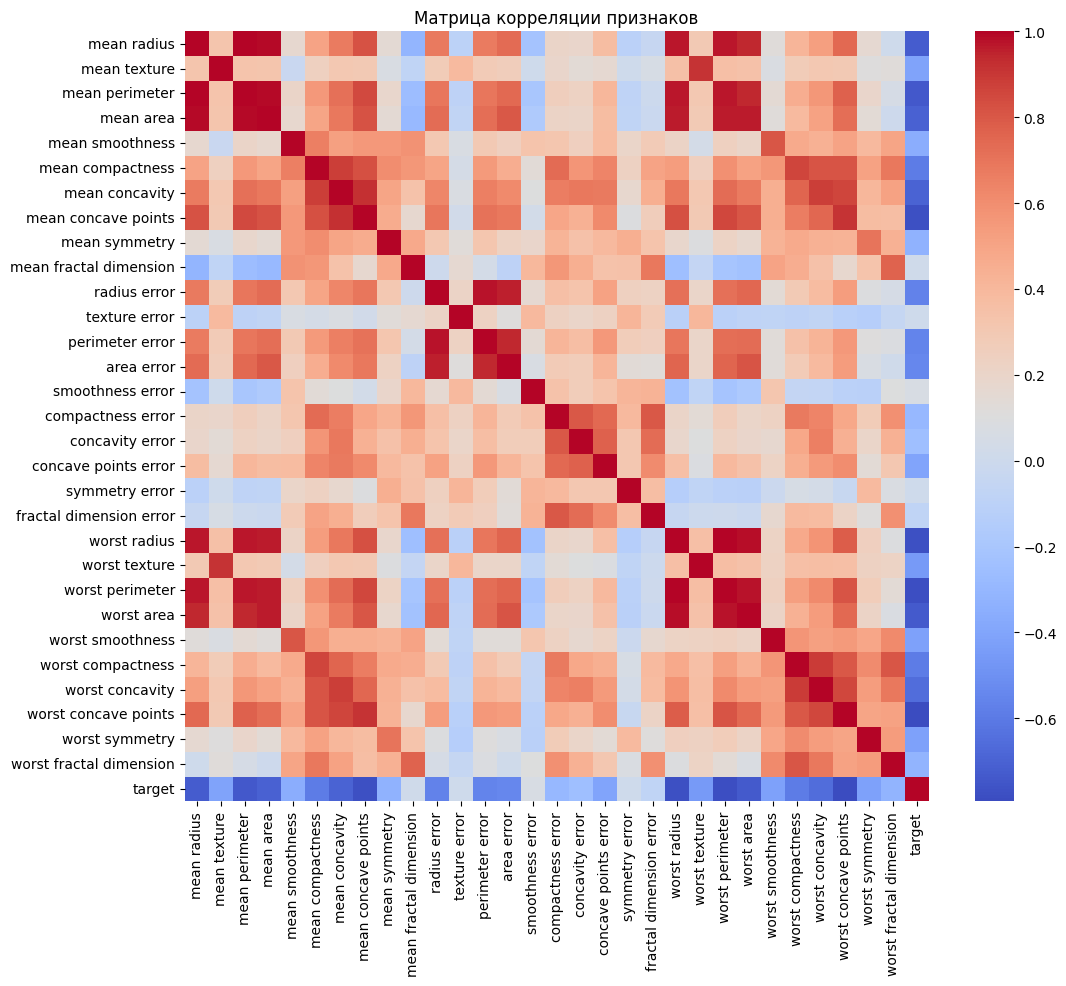

In [429]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Матрица корреляции признаков')
plt.show()

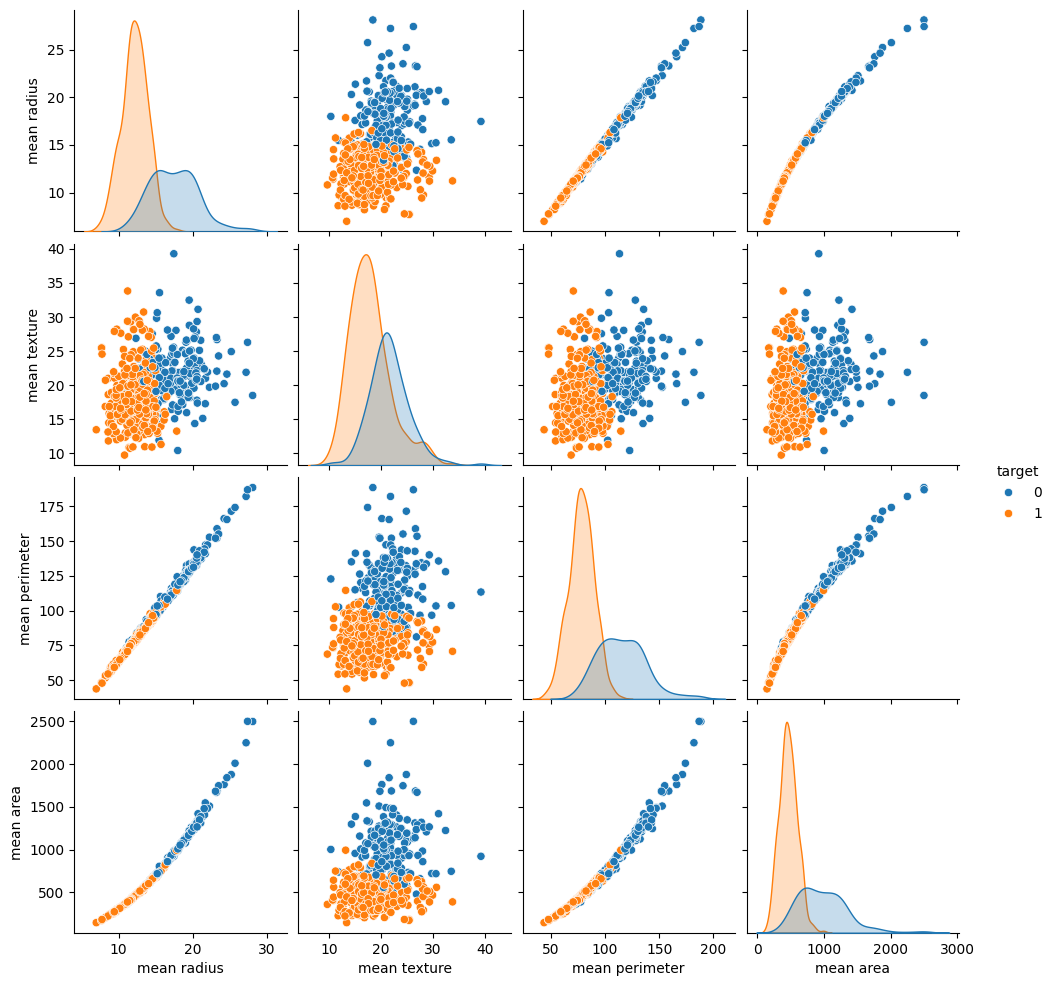

In [430]:
sns.pairplot(df, vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area'], hue='target')
plt.show()

#### Интерпретация:

- **Распределение целевой переменной:** Важно проверить, сбалансированы ли классы. Если один класс преобладает, может потребоваться применение методов балансировки.
- **Матрица корреляции:** Помогает выявить сильно коррелированные признаки, что может быть полезно для отбора признаков и уменьшения размерности.
- **Парные графики:** Позволяют визуально оценить разделимость классов по различным признакам.

## 2. Препроцессинг данных

### Преобразование категориальных признаков в вещественные

В данном наборе данных все признаки уже являются числовыми. Однако целевая переменная изначально представлена как числовая (0 и 1), что подходит для большинства моделей машинного обучения. Если бы были категориальные признаки, их можно было бы преобразовать с помощью методов кодирования, таких как One-Hot Encoding.

### Нормализация признаков

Нормализация или стандартизация признаков необходима для улучшения сходимости алгоритмов и обеспечения равного вклада признаков при обучении моделей.

Используем `StandardScaler` из `sklearn.preprocessing` для стандартизации признаков.

In [431]:
from sklearn.preprocessing import StandardScaler

Разделение на признаки и целевую переменную

In [432]:
X = df.drop('target', axis=1)
X

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [433]:
y = df['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

Стандартизация признаков

In [434]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

## 3. Эксперименты с методами

Рассмотрим три метода:

1. **Логистическая регрессия**.
2. **Метод потенциальных функций**.
3. **Метод Парзеновского окна**.

### Разделение данных на обучающую и тестовую выборки

In [435]:
from sklearn.model_selection import train_test_split


# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

### 3.1 Логистическая регрессия

In [436]:
from sklearn.linear_model import LogisticRegression


# Определение модели
log_reg = LogisticRegression(solver='liblinear')

#### Подбор гиперпараметров и регуляризаторов

Логистическая регрессия имеет гиперпараметры, такие как регуляризация (L1, L2) и коэффициент регуляризации `C`.

Используем `GridSearchCV` для подбора оптимальных параметров.

In [437]:
from sklearn.model_selection import GridSearchCV


# Гиперпараметры для подбора
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Поиск с кросс-валидацией
grid_search_log = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search_log.fit(X_train, y_train)

print("Лучшие параметры логистической регрессии:", grid_search_log.best_params_)

Лучшие параметры логистической регрессии: {'C': 1, 'penalty': 'l2'}


#### Итоговая модель

In [438]:
best_log_reg = grid_search_log.best_estimator_


# Оценка на тестовой выборке
from sklearn.metrics import accuracy_score, classification_report


# Предсказания на тестовой выборке
y_pred_log = best_log_reg.predict(X_test)

# Оценка точности
accuracy_log_reg = accuracy_score(y_test, y_pred_log)
print(f"Точность Логистической Регрессии: {accuracy_log_reg:.6f}")

# Полный отчёт классификации
print("Отчёт классификации Логистической Регрессии:")
print(classification_report(y_test, y_pred_log))

Точность Логистической Регрессии: 0.982456
Отчёт классификации Логистической Регрессии:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### 3.2 Метод потенциальных функций

#### Реализации метода

In [439]:
import numpy as np
from scipy.spatial.distance import cdist


class PFM(object):
    def __init__(self, kernel=None):
        self.X, self.Y, self.gams = None, None, None
        if kernel is not None:
            self.kernel = kernel
        else:
            self.kernel = lambda x: np.ones_like(x)
    
    def scores(self, X):
        # Вычисление матрицы расстояний между X и обучающими данными
        distance_matrix = cdist(X, self.X)
        
        # Применение ядра к расстояниям
        features = self.gams * self.kernel(distance_matrix)
        
        # Вычисление баллов для каждого класса
        score_class_0 = np.sum(features[:, self.Y == 0], axis=1)
        score_class_1 = np.sum(features[:, self.Y == 1], axis=1)
        
        scores = np.vstack([score_class_0, score_class_1]).T
        return scores
    
    def predict(self, X):
        scores = self.scores(X)
        return np.argmax(scores, axis=1)
    
    def fit(self, X, Y, epoch=10):
        self.X = np.array(X)
        self.Y = np.array(Y)
        self.gams = np.zeros(len(Y))
        for e in range(epoch):
            errors = 0
            for i, (x, y) in enumerate(zip(self.X, self.Y)):
                pred = self.predict(np.array([x]))[0]
                if pred != y:
                    self.gams[i] += 1
                    errors += 1
            print(f'Epoch {e+1}/{epoch}, Number of misclassifications: {errors}')
            if errors == 0:
                print("Обучение завершено: все примеры классифицированы корректно.")
                break

#### Обучение модели PFM

Инициализируем и обучим модель PFM. Будем использовать радиальное базисное ядро (RBF), для лучшей производительности.

In [440]:
# Импорт необходимого ядра (RBF)
from scipy.stats import norm


# Определение RBF ядра
def rbf_kernel(distance, gamma=0.1):
    return np.exp(-gamma * (distance ** 2))


# Инициализация модели PFM с RBF ядром
pfm_model = PFM(kernel=lambda x: rbf_kernel(x, gamma=0.1))

# Обучение модели
pfm_model.fit(X_train, y_train, epoch=15)

Epoch 1/15, Number of misclassifications: 28
Epoch 2/15, Number of misclassifications: 15
Epoch 3/15, Number of misclassifications: 8
Epoch 4/15, Number of misclassifications: 4
Epoch 5/15, Number of misclassifications: 4
Epoch 6/15, Number of misclassifications: 7
Epoch 7/15, Number of misclassifications: 5
Epoch 8/15, Number of misclassifications: 3
Epoch 9/15, Number of misclassifications: 2
Epoch 10/15, Number of misclassifications: 1
Epoch 11/15, Number of misclassifications: 0
Обучение завершено: все примеры классифицированы корректно.


#### Оценка производительности модели PFM

После обучения модели оценим её производительность на тестовой выборке.

In [441]:
# Предсказания на тестовой выборке
y_pred_pfm = pfm_model.predict(X_test)

# Оценка точности
accuracy_pfm = accuracy_score(y_test, y_pred_pfm)
print(f"Точность PFM: {accuracy_pfm:.6f}")

# Полный отчёт классификации
print("Отчёт классификации PFM:")
print(classification_report(y_test, y_pred_pfm))

Точность PFM: 0.982456
Отчёт классификации PFM:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### 3.3 Метод Парзеновского окна

In [442]:
# Определение функции ядра Парзеновского окна (ядро Эпанечникова)
def parzen_kernel(distance, h=0.05):
    """
    Эпанечниково ядро (Parzen window kernel).
    
    Параметры:
    - distance: расстояние до соседей
    - h: ширина окна
    
    Возвращает:
    - Вес для каждого расстояния
    """
    ret = np.array(distance) / h
    return (0.75) * (1 - ret**2) * (np.abs(ret) <= 100)

In [443]:
# Фабричная функция для создания функций ядра с фиксированным h
def create_parzen_weight(h):
    """
    Создаёт функцию веса с фиксированным параметром h.
    
    Параметры:
    - h: ширина окна
    
    Возвращает:
    - Функция веса
    """
    return lambda d: parzen_kernel(d, h=h)

#### Подбор гиперпараметров

Основные гиперпараметры для метода Парзеновского окна: число соседей `n_neighbors`, весовая функция и метрика расстояния.

In [444]:
from sklearn.neighbors import KNeighborsClassifier


# Определение модели
knn = KNeighborsClassifier()

In [445]:
# Список значений h для подбора
h_values = [0.1, 0.5, 1, 5, 10, 20]

# Генерация списка функций весов с разными h
parzen_weights = [create_parzen_weight(h) for h in h_values]

# Добавление стандартных опций весов для сравнения
weights_options = parzen_weights + ['uniform', 'distance']

In [446]:
# Определение сетки гиперпараметров
param_grid_knn = {
    'n_neighbors': list(range(1, 31)),
    'weights': weights_options,
    'metric': ['euclidean', 'manhattan']
}

# Поиск с кросс-валидацией
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

print("Лучшие параметры KNN:", grid_search_knn.best_params_)

Лучшие параметры KNN: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': <function create_parzen_weight.<locals>.<lambda> at 0x7862b4281000>}


#### Итоговая модель

In [447]:
best_knn = grid_search_knn.best_estimator_
# best_knn = KNeighborsClassifier(n_neighbors = 4, weights=create_parzen_weight(10))
# best_knn.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred_knn = best_knn.predict(X_test)

# Оценка точности
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Точность Парзеновского окна: {accuracy_knn:.6f}")

# Полный отчёт классификации
print("Отчёт классификации Парзеновского окна:")
print(classification_report(y_test, y_pred_knn))

Точность Парзеновского окна: 0.964912
Отчёт классификации Парзеновского окна:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## Заключение

### Описание результатов:

Логистическая регрессия продемонстрировала наивысшую точность (98.25%) и сбалансированную производительность для обоих классов, что делает её предпочтительным выбором для данной задачи классификации рака молочной железы.

Метод потенциальных функций (PFM) также показал высокую точность — 98.25%, но требует тщательной настройки и может быть менее удобен в использовании из-за своей сложности. Метод Парзеновского окна уступил, показав несколько более низкую точность — 96.49%, особенно при классификации злокачественных опухолей (класс 0).

### Проблемы:

Основная проблема заключалась в вычислительной сложности метода потенциальных функций и метода Парзеновского окна, особенно при работе с большими наборами данных. Оба метода требуют правильного подбора гиперпараметров и ядра, что увеличивает количество экспериментов для получения оптимальных результатов.

### Ожидания и результаты:

Ожидалось, что логистическая регрессия покажет высокий результат, поскольку этот метод широко используется для задач бинарной классификации и отличается интерпретируемостью и устойчивостью. Логистическая регрессия оправдала ожидания, продемонстрировав высокую точность.

Метод потенциальных функций (PFM) также показал хорошие результаты, но его настройка оказалась сложной, как и предполагалось. Метод Парзеновского окна незначительно уступил в точности, что связано с зависимостью от выбора ширины окна и функции ядра, что подтвердилось на практике.